In [8]:
A = 406.4
B = 410.7

alpha = 0.34
beta = 0.28

In [9]:
# loss as a function of params and data
# cf. eqn 10, https://arxiv.org/pdf/2203.15556.pdf

def l(n, d, A_=A, B_=B, alpha_=alpha, beta_=beta):
    # n, d in billions
    n = n * 1e9
    d = d * 1e9
    model_size_contribution = A_/(n ** alpha_)
    dataset_size_contribution = B_/(d ** beta_)
    return 1.69 + model_size_contribution + dataset_size_contribution, (model_size_contribution, dataset_size_contribution)

In [11]:
import pandas as pd
import numpy as np

# Create array of token values from 100B to 20T
tokens = np.array([0.1, 0.5, 1, 2, 5, 10, 20])  # in trillions
model_sizes = np.array([70, 140, 280, 560, 1120])

# Calculate values for each combination
results = []
for m in model_sizes:
    for t in tokens:
        loss, (msc, dsc) = l(m, t*1000)  # convert trillion to billion
        results.append([m, t*1000, loss, msc, dsc])

# Create DataFrame
df = pd.DataFrame(results, columns=['Model Size (B)', 'Tokens (B)', 'Loss', 'Model Size Contribution', 'Dataset Size Contribution'])

# Format numbers to 4 decimal places
df = df.round(4)

In [12]:
df

,Model Size (B),Tokens (B),Loss,Model Size Contribution,Dataset Size Contribution
0,70,100.0,2.1151,0.0835,0.3416
1,70,500.0,1.9912,0.0835,0.2177
2,70,1000.0,1.9528,0.0835,0.1793
3,70,2000.0,1.9211,0.0835,0.1477
4,70,5000.0,1.8877,0.0835,0.1142
5,70,10000.0,1.8676,0.0835,0.0941
6,70,20000.0,1.8510,0.0835,0.0775
7,140,100.0,2.0976,0.0660,0.3416
8,140,500.0,1.9736,0.0660,0.2177
9,140,1000.0,1.9352,0.0660,0.1793


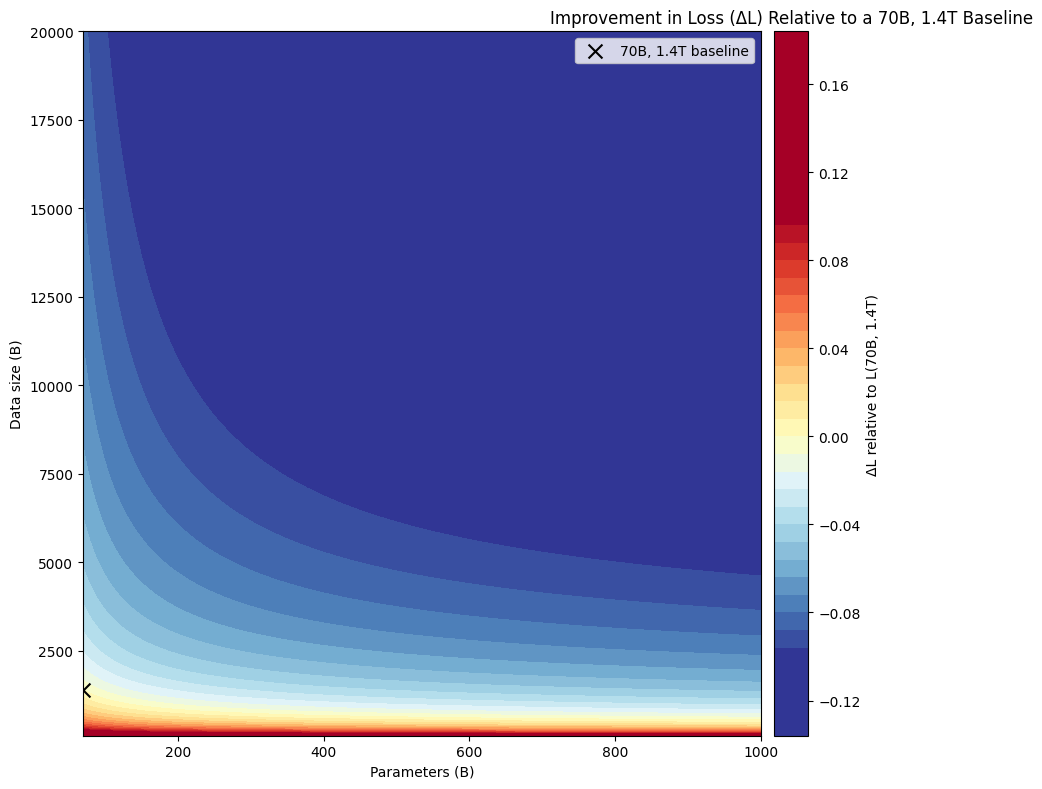

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# Constants from the scaling law in the Chinchilla paper (Approach 3)
A = 406.4
B = 410.7
alpha = 0.34
beta = 0.28
E = 1.69  # irreducible loss

def L(N, D, A_=A, B_=B, alpha_=alpha, beta_=beta):
    # N, D in billions
    N = N * 1e9
    D = D * 1e9
    return E + A_/(N**alpha_) + B_/(D**beta_)

# Baseline: Llama-like with 70B params and 1.4T tokens
N_baseline = 70
D_baseline = 1400
L_baseline = L(N_baseline, D_baseline)

# Define ranges
NMIN, NMAX = 70, 1000   # from 70B to 1T parameters
DMIN, DMAX = 100, 20000 # from 100B to 20T tokens

# Create a grid
Ns = np.linspace(NMIN, NMAX, 200)     # 200 points in param space
Ds = np.linspace(DMIN, DMAX, 200)     # 200 points in data space
Ns_grid, Ds_grid = np.meshgrid(Ns, Ds)

# Compute loss improvements (relative to baseline)
Lgrid = L(Ns_grid, Ds_grid)
Delta_L = Lgrid - L_baseline

# Plot the heatmap of improvement
fig, ax = plt.subplots(figsize=(9,8))
im = ax.contourf(Ns_grid, Ds_grid, Delta_L, levels=40, cmap='RdYlBu_r', 
                 # Choose a symmetric range around zero for better contrast
                 vmin=-0.1, vmax=0.1) 

# Add a colorbar
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("right", size="5%", pad="2%")
cb = fig.colorbar(im, cax=cax)
cb.set_label("ΔL relative to L(70B, 1.4T)")

ax.set_xlabel("Parameters (B)")
ax.set_ylabel("Data size (B)")

# Mark the baseline point
ax.scatter(N_baseline, D_baseline, c='black', marker='x', s=100, label='70B, 1.4T baseline')
ax.legend()

plt.title("Improvement in Loss (ΔL) Relative to a 70B, 1.4T Baseline")
plt.tight_layout()
plt.show()


In [18]:
df

,Model Size (B),Tokens (B),Loss,Model Size Contribution,Dataset Size Contribution,Model Size Contribution %,Dataset Size Contribution %,FLOPS,FLOPS Increase %,Rate of Increase (FLOPS / Loss)
0,70,100.0,2.1151,95.8562,113.1162,-5.371686e+04,-6.338916e+04,42000.0,-92.8571,520.3620
1,70,500.0,1.9912,95.8562,72.0797,-1.758214e+05,-1.322100e+05,210000.0,-64.2857,1179.1412
2,70,1000.0,1.9528,95.8562,59.3642,-5.946833e+05,-3.682901e+05,420000.0,-28.5714,1772.5452
3,70,2000.0,1.9211,95.8562,48.8918,6.181398e+05,3.152845e+05,840000.0,42.8571,2763.6913
4,70,5000.0,1.8877,95.8562,37.8280,1.959468e+05,7.732696e+04,2100000.0,257.1429,5256.4469
5,70,10000.0,1.8676,95.8562,31.1548,1.387768e+05,4.510463e+04,4200000.0,614.2857,8893.3798
6,70,20000.0,1.8510,95.8562,25.6588,1.118903e+05,2.995079e+04,8400000.0,1328.5714,15508.0397
7,140,100.0,2.0976,75.7304,113.1162,-4.706138e+04,-7.029416e+04,84000.0,-85.7143,532.6571
8,140,500.0,1.9736,75.7304,72.0797,-2.047308e+05,-1.948616e+05,420000.0,-28.5714,772.4050
9,140,1000.0,1.9352,75.7304,59.3642,5.370912e+06,4.210198e+06,840000.0,42.8571,30394.9234
